In [1]:
import numpy as np
import pandas as pd 


In [11]:
columns_names = ["user_id","item_id","rating","timestamp"]

In [12]:
df = pd.read_csv("Desktop/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/u.data",sep="\t",names=columns_names)

In [13]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [14]:
movie_titles  = pd.read_csv("Desktop/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/19-Recommender-Systems/Movie_Id_Titles")

In [15]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [16]:
df = pd.merge(df,movie_titles,on="item_id")

In [17]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [19]:
sns.set_style("white")


In [21]:
df.groupby("title")["rating"].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [22]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [23]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())

In [25]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [26]:
ratings["num of ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [27]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


<Axes: >

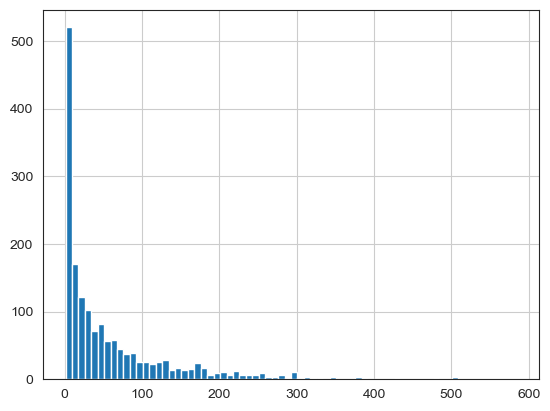

In [29]:
ratings["num of ratings"].hist(bins=70)

<Axes: >

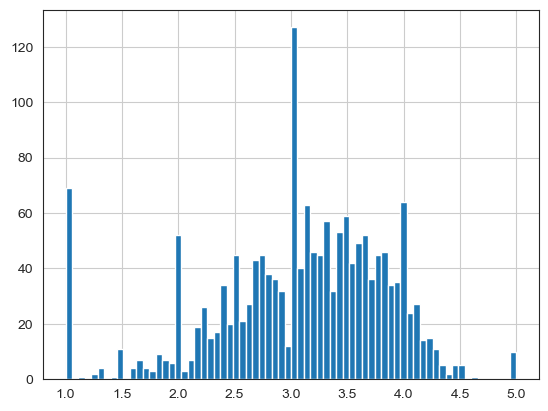

In [30]:
ratings["rating"].hist(bins=70)

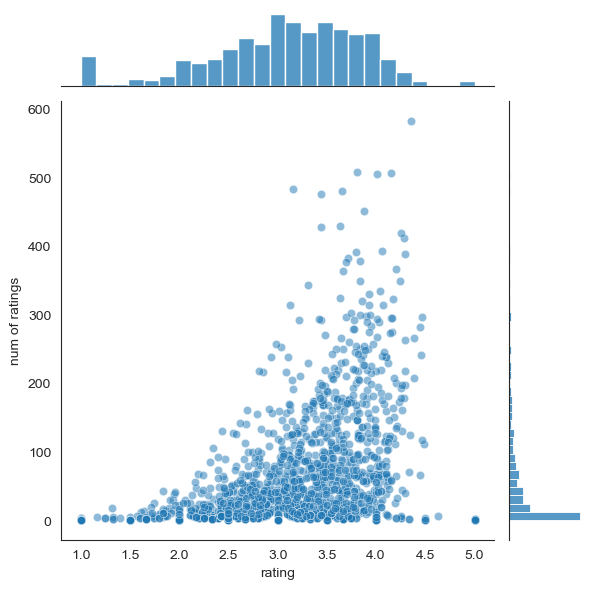

In [32]:
sns.jointplot(x="rating",y="num of ratings",data=ratings,alpha=0.5)